07/22 

[과제] 

1. 타이타닉 생존자 => 생존자 중 성별 비율 시각화 / 나이별 생존자 성별 비율 비교 시각화 ( 하나의 Figure에 모두 표시)


#### 타이타닉 생존자 시각화
- 생존자 중 성별 비율 시각화
- 나이별 생존자 성별 비율 시각화 in 1개 figure

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [34]:
file_path = r'C:\Users\KDP-43\Desktop\KDT_Pandas\과제\DATA\titanic.csv'
titanicDF = pd.read_csv(file_path)

In [35]:
# 데이터 확인
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [36]:
# 결측치 확인
titanicDF.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
# 칼럼별 vales_counts()

for col in titanicDF.columns:

    print(f'{col} 칼럼 valeus_counts(): \n{titanicDF[col].value_counts()}')
    print("="*50)

survived 칼럼 valeus_counts(): 
survived
0    549
1    342
Name: count, dtype: int64
pclass 칼럼 valeus_counts(): 
pclass
3    491
1    216
2    184
Name: count, dtype: int64
sex 칼럼 valeus_counts(): 
sex
male      577
female    314
Name: count, dtype: int64
age 칼럼 valeus_counts(): 
age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
sibsp 칼럼 valeus_counts(): 
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
parch 칼럼 valeus_counts(): 
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
fare 칼럼 valeus_counts(): 
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
embarked 칼럼 valeus_counts(): 
embarked
S    644
C    168
Q     77
Name: count, 

##### 생존자 중 성별 비율 시각화
- survived: 0-> 사망, 1-> 생존

In [38]:
group_titanic = titanicDF.groupby('survived')

In [39]:
# 생존자 그룹 DF
alive_group_DF = group_titanic.get_group(1)
alive_group_DF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [40]:
alive_sex_ratio = {'female':pd.NA, 'male':pd.NA}

for value in alive_group_DF['sex'].unique():

    alive_ratio = round( (alive_group_DF['sex']==value).mean()*100, 2)
    alive_sex_ratio.update( {value:alive_ratio} )


print(alive_sex_ratio)

{'female': 68.13, 'male': 31.87}


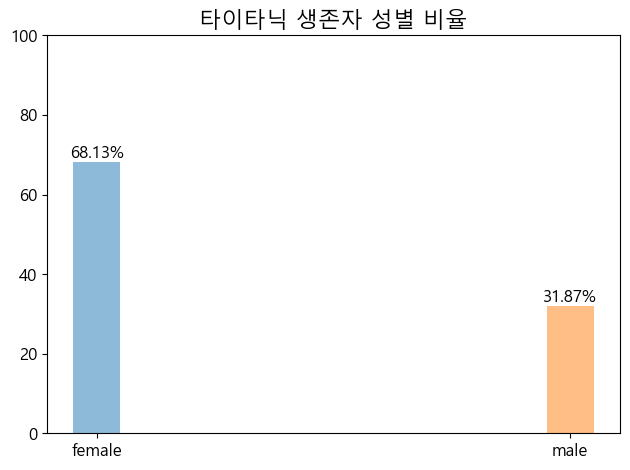

In [41]:
# 생존자 그룹 성별 비율 막대 그래프
index   = list( alive_sex_ratio.keys())

bar_colors = ['tab:blue', 'tab:orange']

# 막대 그래프
bar = plt.bar( index, list( alive_sex_ratio.values() ), alpha=0.5,
        width=0.1, color = bar_colors)

plt.title("타이타닉 생존자 성별 비율", fontsize=16)
plt.ylim(bottom=0, top=100)
plt.yticks(fontsize=12)
plt.xticks( index, fontsize=12)

# 막대 그래프 상단 수치 표시
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, 
             f'{height:4.2f}%', ha='center', va='bottom', size = 12)


plt.tight_layout()
plt.show()

##### 나이별 생존자 성별 비율 시각화 in 1개 figure
* 나이 결측치 처리<br>
          - man,woman,child 데이터 'age'의 mean

In [42]:
titanicDF['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [43]:
# 'age' 칼럼 결측 처리

manavg = round( titanicDF[titanicDF['who']=='man']['age'].mean(), 0)
womanavg = round( titanicDF[titanicDF['who']=='woman']['age'].mean(), 0)
childavg = round( titanicDF[titanicDF['who']=='child']['age'].mean(), 0)

# avg_dict= {'man':manavg,'woman':womanavg,'child':childavg}

for row in titanicDF.index:
    
    if pd.isna(titanicDF.loc[row,'age']):
        if titanicDF.loc[row, 'who'] == 'man':
            titanicDF.loc[row, 'age'] = manavg

        elif titanicDF.loc[row, 'who'] == 'woman':
            titanicDF.loc[row, 'age'] = womanavg

        else:
            titanicDF.loc[row, 'age'] = childavg

titanicDF.age.isna().sum()

0

In [44]:
age_survive = titanicDF[ ['survived', 'sex', 'age'] ]
age_survive.value_counts()

survived  sex     age 
0         male    33.0    117
1         female  32.0     38
0         female  32.0     18
          male    19.0     16
                  21.0     16
                         ... 
          female  48.0      1
                  50.0      1
1         female  47.0      1
0         female  57.0      1
1         male    80.0      1
Name: count, Length: 217, dtype: int64

In [45]:
age_survive['age'].dtypes

dtype('float64')

In [46]:
# pd.cut
# 이민하님 참고 ver.

interval_index = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

age_cut = pd.cut( age_survive["age"], 
                      bins = interval_index,
                      labels = ["어린이", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대"], 
                      right=False)
age_cut

0      20대
1      30대
2      20대
3      30대
4      30대
      ... 
886    20대
887    10대
888    30대
889    20대
890    30대
Name: age, Length: 891, dtype: category
Categories (9, object): ['어린이' < '10대' < '20대' < '30대' ... '50대' < '60대' < '70대' < '80대']

In [47]:
age_survive.loc[:, 'age'] = age_cut
age_survive.head(10)

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_12480\3506588744.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['20대', '30대', '20대', '30대', '30대', ..., '20대', '10대', '30대', '20대', '30대']
Length: 891
Categories (9, object): ['어린이' < '10대' < '20대' < '30대' ... '50대' < '60대' < '70대' < '80대']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  age_survive.loc[:, 'age'] = age_cut


,survived,sex,age
0,0,male,20대
1,1,female,30대
2,1,female,20대
3,1,female,30대
4,0,male,30대
5,0,male,30대
6,0,male,50대
7,0,male,어린이
8,1,female,20대
9,1,female,10대


In [51]:
age_survive.dtypes

survived       int64
sex           object
age         category
dtype: object

In [52]:
age_survive2 = age_survive.groupby( ["sex","age"]).sum()
age_survive2

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_12480\2795339001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survive2 = age_survive.groupby( ["sex","age"]).sum()


survived
sex    age          
female 어린이        19
       10대        34
       20대        52
       30대        86
       40대        22
       50대        16
       60대         4
       70대         0
       80대         0
male   어린이        19
       10대         7
       20대        25
       30대        39
       40대        12
       50대         4
       60대         2
       70대         0
       80대         1

In [78]:
# 연령별 생존률 딕셔너리 key 생성
age_list = []

for _, age in age_survive2.index:
    age_list.append(age)

print( age_list )
print( age_list[:9] )

age_list = age_list[:9]

['어린이', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '어린이', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
['어린이', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']


In [79]:
age_list

['어린이', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [80]:
# 성별에 따른 연령별 생존률 저장 리스트
male_list = []
female_list = []

alive_m_mask = (age_survive['sex'] == "male") & (age_survive["survived"]==1)
alive_f_mask = (age_survive['sex'] == "female") & (age_survive["survived"]==1)

for age_val in age_list:
    male_list.append( round( (alive_m_mask & (age_survive["age"]==age_val)).mean() *100, 2) )
    female_list.append( round( (alive_f_mask & (age_survive["age"]==age_val)).mean() *100, 2) )

print( male_list, female_list, sep="\n\n")

[2.13, 0.79, 2.81, 4.38, 1.35, 0.45, 0.22, 0.0, 0.11]

[2.13, 3.82, 5.84, 9.65, 2.47, 1.8, 0.45, 0.0, 0.0]


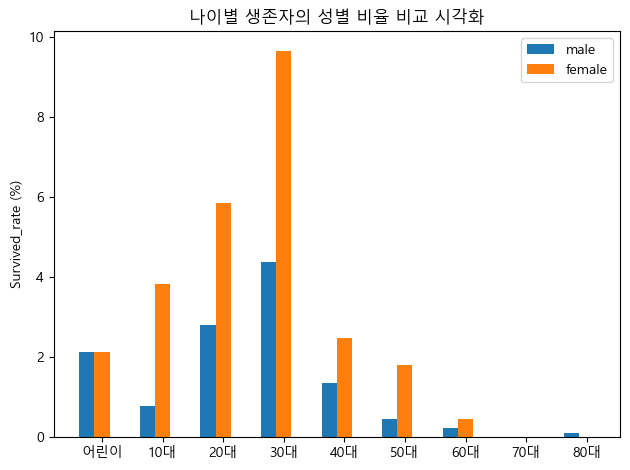

In [83]:
# 막대그래프 

alive_sex_dict = {"male" : male_list,
            "female" : female_list}

# 다중 막대 그래프 offset 지정
width = 0.25
multiplier = 0
x = np.arange(len(age_list))

for sex, rate in alive_sex_dict.items():
    offset = width * multiplier
    plt.bar(x + offset, rate, width, label = sex)
    multiplier += 1

plt.ylabel("Survived_rate (%)")
plt.title("나이별 생존자의 성별 비율 비교 시각화")
plt.xticks(x + width, age_list)
plt.legend()
plt.tight_layout()
plt.show()